* bayesian modeling by pystan

In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pystan

In [2]:
# create sample data

n = 10
train_x = []
train_y = []

for i in range(n):
    x = round(np.random.rand()*4+3, 1) # random 3.0 ~ 7.0
    mu = np.exp(1.5+0.1*x) # poisson's mu
    y = np.random.poisson(mu) # poisson
    train_x.append(x)
    train_y.append(y)
    
train_x, train_y

([4.2, 3.6, 6.6, 6.4, 5.8, 6.7, 3.9, 5.7, 4.2, 6.4],
 [6, 7, 12, 6, 15, 11, 8, 7, 9, 9])

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b64e361702f224e0ddb415401479c23b NOW.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Inference for Stan model: anon_model_b64e361702f224e0ddb415401479c23b.
3 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta1   1.54    0.04   0.51   0.53   1.21   1.55   1.91   2.51    137   1.01
beta2   0.12  7.5e-3   0.09  -0.06   0.06   0.12   0.18    0.3    142   1.01
lp__  107.56    0.04   0.95 105.04 107.18 107.81 108.23  108.5    528   1.01

Samples were drawn using NUTS at Thu Aug  2 09:43:52 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


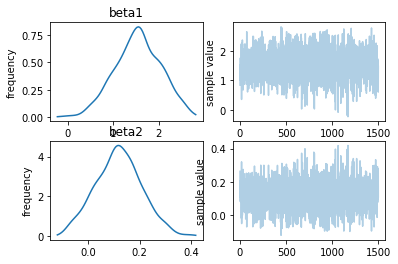

In [4]:
stan_data = {'n': n, 'x': train_x, 'y': train_y}
model = """
data {
    int<lower=1>n;
    vector[n] x;
    int<lower=0> y[n];
}
parameters {
    real beta1;
    real beta2;
}
model {
    for (i in 1:n){
        y[i] ~ poisson(exp(beta1+beta2*x[i]));
    }
    beta1 ~ normal(0, 1000);
    beta2 ~ normal(0, 1000);
}
"""
fit = pystan.stan(model_code=model, data=stan_data, iter=1000, chains=3)
print(fit)
fit.plot()
plt.show()

In [5]:
!python --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [6]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.10
algopy==0.5.7
altair==2.1.0
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
annoy==1.12.0
appdirs==1.4.3
arrow==0.12.1
asn1crypto==0.22.0
astor==0.7.1
astroid==1.5.3
astropy==2.0.2
attrs==18.1.0
audioread==2.1.6
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.1.0
bayesian-optimization==0.6.0
bayespy==0.5.17
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.72
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
blist==1.3.6
bokeh==0.13.0
Boruta==0.1.5
boto==2.48.0
boto3==1.7.54
botocore==1.10.54
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.0
bz2file==0.98
cachetools==2.1.0
cairocffi==0.8.1
CairoSVG==2.1.3
Cartopy==0.16.0
catboost==0.9.1.1
category-encoders==1.2.8
certifi==2018.4.16
cffi==1.10.0
chainer==4.2.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.4.0
clyent==1.2.2
cmudi

testpath==0.3.1
textacy==0.6.1
textblob==0.15.1
tflearn==0.3.2
Theano==1.0.2
thinc==6.10.2
tifffile==0.15.0
tinycss2==0.6.1
toolz==0.8.2
torch==0.4.0
torchaudio==0.1
torchtext==0.2.3
torchvision==0.2.1
tornado==4.5.2
TPOT==0.9.3
tqdm==4.23.4
trackml==0.1.12
traitlets==4.3.2
trueskill==0.4.4
typing==3.6.2
tzlocal==1.5.1
ujson==1.35
umap-learn==0.2.5
unicodecsv==0.14.1
Unidecode==1.0.22
update-checker==0.16
uritemplate==3.0.0
urllib3==1.22
urwid==2.0.1
vecstack==0.3.0
vega3==0.13.0
vida==0.3
visvis==1.11.1
-e git+https://github.com/JohnLangford/vowpal_wabbit.git@9195fa2667fe9b720683a5df9c89c305a2cadcf9#egg=vowpalwabbit&subdirectory=python
vtk==8.1.1
wavio==0.0.3
wcwidth==0.1.7
webencodings==0.5.1
websocket-client==0.48.0
Werkzeug==0.12.2
wfdb==2.2.0
widgetsnbextension==3.0.2
Wordbatch==1.3.0
wordcloud==1.4.1
wordsegment==1.3.1
wrapt==1.10.11
xarray==0.10.7
xgboost==0.72
xlrd==1.1.0
XlsxWriter==1.0.2
xlwt==1.3.0
yellowbrick==0.7
zict==0.1.3
